# Predicting Car Accident Severity 

### Background

The Seattle Department of Transportation (SDOT) has a mission to eliminate all traffic-related deaths and injuries by 2030, also known as the ‘Vision Zero’ program. On average, the city faces 85 cases related to serious-injury or collisions and these numbers are far from achieving SDOT’s target. 

There is a strong need to reduce the number of cases resulting in serious injuries or deaths in the city. SDOT was heavily critised in recent months for delaying safety improvements, where an elderly man was killed and two girls were hit and injured. 





![Image of Traffic accident](https://static.seattletimes.com/wp-content/uploads/2019/07/trafficinjuries-deaths-chart-W.jpg)

### Objective

As a result, SDOT has consolidated data which was archived over many years and needed to understand the different combination of conditions (e.g. weather, road conditions, light conditions) that have an effect on accident severity. The data needs to be analysed and trained in order to help them predict the severity of future collisions. The aim here is to reduce the number of accidents related to bodily injuries each year by 10% in the city over the next 10 years in order to achieve 'Vision Zero'. Once the predictive model is deployed, SDOT can communicate the information quickly to drivers via weather channels or updates when they are on the road. The warnings given to the drivers will certainly reduce the risks of encountering collisions in the future.   

The hypothesis is that since Seattle experiences Pacific Northwest climate, which is described as wet and mildly cold, the wet weather could be causing a majority of these accidents. 

### About the data set

The data provided by SDOT goes back to 2004 and focuses on details including location of the accident, time, types of collision, road conditions, weather conditions, and number of people count. The target field in this case is "SEVERITYCODE", where there are 2 levels.

2  - injury<br>
1  - prop damage<br>



In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = "https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"

In [3]:
df_master = pd.read_csv (filename)

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Data understanding

In [4]:
df_master.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [5]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

**A total of 37 columns with a number of attributes containing missing values. Most of them are classified as categorical (object)**

In [6]:
df_master.shape

(194673, 38)

**A fairly large amount of data with over 190,000 rows**

In [7]:
df_master['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

**The available data indicates that there are only 2 types of cases: (1) - prop damage and (2) - injury. Property damage accounts for about 70% of the cases, which makes the dataset unbalanced. This needs to be addressed by resampling before training the featured dataset**

In [8]:
#Replace blank value with NaN

df_master.replace (" ", np.nan, inplace=True)

**Empty cells were already populated with NaN, however we need to make sure that this is true**

In [9]:
# Assign missing_data to check for missing data in table

missing_data = df_master.isnull()

In [10]:
#To count missing values in each column
#Use for loop method 

for column in missing_data.columns.values.tolist():
  print (column)
  print (missing_data[column].value_counts())
  print ("")


SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     189035
False      5638
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

In [11]:
# 1. X True       5334
# 2. Y True       5334
# 3. ADDRTYPE True       1926
# 4. INTKEY True     129603
# 5. LOCATION True       2677
# 6. EXCEPTRSNCODE True     109862
# 7. EXCEPTRSNDESC True     189035
# 8. COLLISIONTYPE True       4904
# 9. JUNCTIONTYPE True       6329
# 10. INATTENTIONIND True     164868
# 11. UNDERINFL True       4884
# 12. WEATHER True       5081
# 13. ROADCOND True       5012
# 14. LIGHTCOND True       5170
# 15. PEDROWNOTGRNT True     190006
# 16. SDOTCOLNUM True      79737
# 17. SPEEDING True     185340
# 18. ST_COLCODE True       4904
# 19. ST_COLDESC True       4904

 



**A summary of missing values and counts (if True exists). 19 attributes have missing values 'NaN' and we need to either fill them or discard them depending on the situation**

### Data cleaning

In [12]:
#Drop "INTKEY", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "INATTENTIONIND", "PEDROWNOTGRNT","SPEEDING"  

df_master.drop(["INTKEY", "EXCEPTRSNCODE", "EXCEPTRSNDESC", "INATTENTIONIND", "PEDROWNOTGRNT", "SPEEDING"], axis=1, inplace=True)

**We can first removed those that have excessive missing data (More than half)**

In [13]:
#Drop the following attributes as they do not add further value to the analysis

df_master.drop(["X", "Y", "OBJECTID","INCKEY", "COLDETKEY", "REPORTNO", "STATUS", "ADDRTYPE", "LOCATION","SDOTCOLNUM", "SEVERITYCODE.1", "SEVERITYDESC", "COLLISIONTYPE", "PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT", "INCDATE", "INCDTTM", "JUNCTIONTYPE", "SDOT_COLDESC", "SDOT_COLCODE", "ST_COLDESC", "SDOTCOLNUM", "ST_COLCODE", "ST_COLDESC", "SEGLANEKEY", "CROSSWALKKEY", "HITPARKEDCAR"], axis=1, inplace=True)

df_master.columns

Index(['SEVERITYCODE', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND'], dtype='object')

**The dropped atrributes are as a result of the accidents, rather than the cause and hence provides little to no value to our analysis. We now have 4 independent variables and 1 independent variable. Of note, all of the attributes are categorical and only "UNDERINFL" (under influence) is considered to be caused by human behavior**

In [14]:
#Calculate frequency of values for "WEATHER"

df_master["WEATHER"].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [15]:
#Replace NaN with "Clear"

df_master["WEATHER"].replace(np.nan, "Clear", inplace=True)

In [16]:
#Calculate frequency of values for "WEATHER"

df_master["LIGHTCOND"].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [17]:
#Replace Nan with "Daylight"

df_master["LIGHTCOND"].replace(np.nan, "Daylight", inplace=True)

In [18]:
#Calculate frequency of values for "ROADCOND"

df_master["ROADCOND"].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [19]:
#Replace Nan with "Dry"

df_master["ROADCOND"].replace(np.nan, "Dry", inplace=True)

**Missing data are filled with mode of the dataset**

In [20]:
#For "UNDERINFL", mix of "Y" and "N" and 1 and 0 found. Change "Y" to 1 and "No" to 0 

df_master["UNDERINFL"].replace("Y", "1", inplace=True)
df_master["UNDERINFL"].replace("N", "0", inplace=True)

**For this variable, it was found to have a mixed of binary numbers and strings. Here we assume Y = 1, N = 0**

In [21]:
# Remove rows with empty "UNDERINFL" values 
df_master.dropna(subset=["UNDERINFL"], axis=0, inplace=True)

**Missing data cannot be replaced as the it's too specific for the analysis**

In [22]:
#Final check on missing data

missing_data = df_master.isnull()
for column in missing_data.columns.values.tolist():
  print (column)
  print (missing_data[column].value_counts())
  print ("")

SEVERITYCODE
False    189789
Name: SEVERITYCODE, dtype: int64

UNDERINFL
False    189789
Name: UNDERINFL, dtype: int64

WEATHER
False    189789
Name: WEATHER, dtype: int64

ROADCOND
False    189789
Name: ROADCOND, dtype: int64

LIGHTCOND
False    189789
Name: LIGHTCOND, dtype: int64



**Now there are no more missing data in the table and we now have a list of key features extracted for our modeling**

In [23]:
#Given that our target variable only has 2 values , 1 or 2, changing to 0 to 1 makes it binary. therefore now 0 = prop damage and 1 = injury 

df_master["SEVERITYCODE"].replace(1, 0, inplace=True)

In [24]:
df_master["SEVERITYCODE"].replace(2, 1, inplace=True)

In [25]:
df_master["SEVERITYCODE"].value_counts()

0    132630
1     57159
Name: SEVERITYCODE, dtype: int64

In [26]:
df_master.shape

(189789, 5)

**The number of rows has been reduced to 189,789 and the codes for "SEVERRITYCODE" is converted to 1s and 0s**

### Exploratory Data Analysis

In [27]:
%%capture
! pip install seaborn

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 1.0, 'Number of cases due to drink driving')

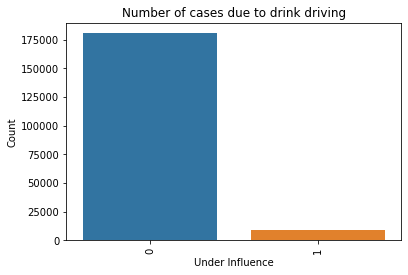

In [29]:
sns.countplot(x="UNDERINFL", data=df_master)

plt.xticks(rotation=90)
plt.xlabel("Under Influence")
plt.ylabel("Count")
plt.title("Number of cases due to drink driving")

**A significant number of accidents were in fact NOT caused by driving under influence. This suggests that most of the cases are as a result of the external environment, which is not under the control of the drivers**

Text(0.5, 1.0, 'Count value of Weather types')

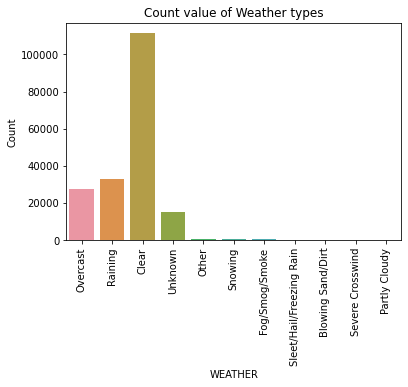

In [30]:
sns.countplot(x="WEATHER", data=df_master)

plt.xticks(rotation=90)
plt.xlabel("WEATHER")
plt.ylabel("Count")
plt.title("Count value of Weather types")

**Interestingly, the accidents happened most of the time under clear weather conditions. Seattle is known for it's Pacific Northwest climate, where it rains most of the time of the year except for the summer season. This could also mean that drivers are more likely travel outside during summer period and therefore accidents are more likely to increase. A possible solutions is for SDOT to enforce more of the safety messages during the summer season.**

Text(0.5, 1.0, 'Count value of Road conditions')

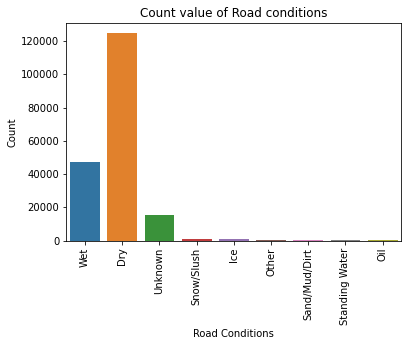

In [31]:
sns.countplot(x="ROADCOND", data=df_master)

plt.xticks(rotation=90)
plt.xlabel("Road Conditions")
plt.ylabel("Count")
plt.title("Count value of Road conditions")

**There should be a strong correlation between road conditions and weather given that a dry road conditions is due to a clear weather. This again is a strong indication that majority of the accidents happened in dry and clear weather**

Text(0.5, 1.0, 'Count value of Light conditions')

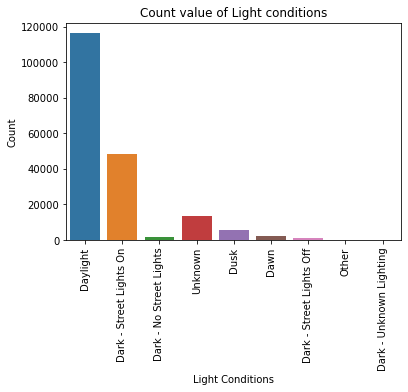

In [32]:
sns.countplot(x="LIGHTCOND", data=df_master)

plt.xticks(rotation=90)
plt.xlabel("Light Conditions")
plt.ylabel("Count")
plt.title("Count value of Light conditions")

**Another interesting discovery: drivers tend to encounter accidents during daytime when their vision should be at their clearest. However we can also attribute this to the summer period, where daylight can last until 10 pm local time. This certainly will increase the risk of accidents happening under daylight conditions** 

### Preprocessing

In [33]:
#Shuffling the dataset
df_random = df_master.sample(frac=1, random_state=4)

#Place all the property Injury class in another dataset
df_injury = df_random.loc[df_random["SEVERITYCODE"] == 1]

#Select 57159 observations from Property Damage class
df_prop_damage = df_random.loc[df_random["SEVERITYCODE"] == 0].sample(n=57159, random_state=4)

#Join both the df to give the new balanced df
df_master_2 = pd.concat([df_injury, df_prop_damage])

df_master_2["SEVERITYCODE"].value_counts()


1    57159
0    57159
Name: SEVERITYCODE, dtype: int64

**As observed earlier, the dataset is not well-balanced because property damage (0) accounts for about 70% of the accidents. We apply undersampling technique to the dataset and now it looks more balanced, with 50% for both classes. This will improve the quality and performance of the generated models**

In [34]:
df_master_2.head(5)

,SEVERITYCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
82581,1,0,Clear,Dry,Daylight
169413,1,0,Clear,Dry,Daylight
6054,1,0,Clear,Dry,Daylight
6134,1,0,Clear,Unknown,Dark - Street Lights On
92424,1,0,Clear,Dry,Dark - Street Lights On


In [35]:
# Designate the X variables for our model

X = df_master_2[["WEATHER", "ROADCOND", "LIGHTCOND", "UNDERINFL"]].values
X[0:5]

array([['Clear', 'Dry', 'Daylight', '0'],
       ['Clear', 'Dry', 'Daylight', '0'],
       ['Clear', 'Dry', 'Daylight', '0'],
       ['Clear', 'Unknown', 'Dark - Street Lights On', '0'],
       ['Clear', 'Dry', 'Dark - Street Lights On', '0']], dtype=object)

In [36]:
# Convert the X variables to dummy variables since ML models cannot handle categorical variables
from sklearn.preprocessing import OneHotEncoder

#Instantiate OneHotEncoder
ohe = OneHotEncoder(sparse=False)

#Apply ohe to the categorical columns
X_ohe = ohe.fit_transform(X)

In [37]:
X_ohe[0:2]


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.]])

In [38]:
# Designate the y variables for our model

y =np.asarray(df_master_2["SEVERITYCODE"])
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

**The X and y variables have been set up and is ready to be used to train and test the model**

### Modeling


Given that this is a classification prediction (whether certain conditions is likely to bring about either the two types of accidents), 3 suitable models are selected:

**Decision Tree Analysis**

In [39]:
#import packages to set up the decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [40]:
#Splitting the training and test data set
X_train, X_test, y_train, y_test = train_test_split( X_ohe, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (91454, 31) (91454,)
Test set: (22864, 31) (22864,)


In [41]:
#Building the Decision Tree
SeverityTree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
SeverityTree
SeverityTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [42]:
#Making prediction on test data
predTree = SeverityTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 0 1 0 1]
[1 0 1 1 0]


**Logistic Regression**

In [43]:
#Import packages for logistic regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [44]:
#Predicting with test data
LR_yhat = LR.predict(X_test)
LR_yhat

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [45]:
#Run probability of predictability
LR_yhat_prob = LR.predict_proba(X_test)
LR_yhat_prob

array([[0.46480322, 0.53519678],
       [0.57577881, 0.42422119],
       [0.46480322, 0.53519678],
       ...,
       [0.46480322, 0.53519678],
       [0.46480322, 0.53519678],
       [0.46480322, 0.53519678]])

**KNN**

In [46]:
#Import packages for KNN analysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):

    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.55239678, 0.51447691, 0.54312456, 0.55440868, 0.55672673,
       0.54216235, 0.54430546, 0.50345521, 0.54504899])

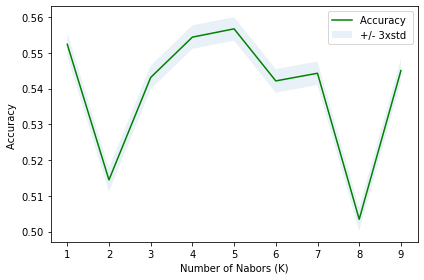

In [47]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [48]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.5567267319804059 with k= 5


In [49]:
#Use k=5 for our KNN model
k = 5

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

In [50]:
#Predicting the model using test set
KNN_hat=neigh.predict(X_test)
KNN_hat[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

### Evaluation

To check the accuracy of the 3 models on the test sets, we will implement Jaccard index, F1-score, and LogLoss (for LR only)

In [51]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

**Decision Tree Analysis**

In [52]:


print("Jaccard index: %.2f" % jaccard_score(y_test, predTree))
print("F1-score: %.2f" % f1_score(y_test, predTree, average='weighted') )

Jaccard index: 0.49
F1-score: 0.54


**Logistic Regression**

In [53]:
print("LR Jaccard index: %.2f" % jaccard_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.49
LR F1-score: 0.54
LR LogLoss: 0.66


**KNN**

In [54]:
Where k = 5,

print("Jaccard index: %.2f" % jaccard_score(y_test, KNN_hat))
print("F1-score: %.2f" % f1_score(y_test, KNN_hat, average='weighted')) 

SyntaxError: invalid syntax (<ipython-input-54-a5c019437666>, line 1)

### Report and Results

|Algorithm|Jaccard index|F1-score|Log Loss|
|---------|:------------:|:--------:|:--------:|
|Decision Tree|0.49|0.54|NA|
|Logistic Regression|0.49|0.54|0.66|
|KNN|0.45|0.54|NA|

**When tested using the four evaluation models, the three algorithms performed fairly similar, with KNN giving a slightly score on the Jaccard index.** 

### Conclusion

Based on the objectives of the analysis, four key features-drinking under influence, road conditions, light conditions and weather - were extracted from dataset provided. The data had be converted to numerical variables given that ski-kit learn ML only recognizes integers and floats. 

The data was then fed in to three algorithms and results suggest that deploying the Decision Tree or Logistic Regression algorithms to predict accident severity are good options.  

With this predictive model, SDOT can better understand which day and time with specific weather conditions are at higher risks of traffic collisions. Bodily injuries can be better prevented once they transmit and reinforce safety messages to the drivers. In particular, they can allocate more resources during the summer season because as observed, the number of cases tend to be higher during the period.   